In [122]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sknetwork.visualization import svg_graph
from sknetwork.ranking import PageRank
import sknetwork

In [123]:
# Step 1: Define gene-gene interaction data
gene_interactions_df = pd.read_csv('hierarchical-hotnet/shapelet_test/data/networkFIS.csv', header=None, sep='\t')
# take 100 random rows
gene_interactions_df = gene_interactions_df.sample(20)

gene_interactions = list(gene_interactions_df.itertuples(index=False, name=None))

gene_interactions

[('PBX3', 'RFX2'),
 ('CAMK2D', 'CREB5'),
 ('APBA1', 'APP'),
 ('ESR1', 'NCOA3'),
 ('ITGA4', 'LIMS1'),
 ('CCNE2', 'CDK1'),
 ('CXCR6', 'XCL1'),
 ('MED13L', 'PPARG'),
 ('JAK2', 'OSM'),
 ('TIAM1', 'VAV3'),
 ('PLK1', 'TCTN3'),
 ('LTB', 'NFKB1'),
 ('BUB1', 'CDCA8'),
 ('BTK', 'TRAF3'),
 ('CALCB', 'CALCRL'),
 ('NCF2', 'PAK1'),
 ('KNL1', 'MAD2L1'),
 ('IL4', 'RBPJ'),
 ('PTPN13', 'SRC'),
 ('CYP1B1', 'HPGDS')]

In [124]:
graph = sknetwork.data.from_edge_list(gene_interactions)

In [125]:
adjacency = graph.adjacency

In [126]:
pagerank = PageRank()
scores = pagerank.fit_predict(adjacency)

In [127]:
genes = list({gene for pair in gene_interactions for gene in pair})
n_genes = len(genes)
angle = np.linspace(0, 2 * np.pi, n_genes, endpoint=False)
radius = 1
position = np.column_stack((radius * np.cos(angle), radius * np.sin(angle)))

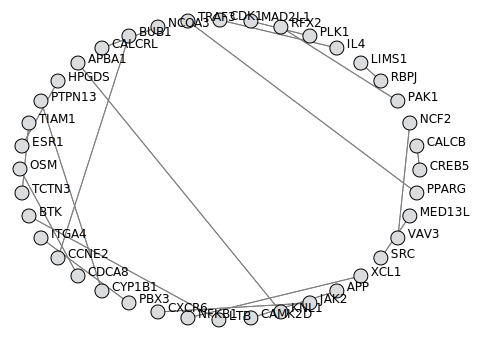

In [128]:
image = visualize_graph(adjacency, position, scores=np.log(scores), names=genes)
SVG(image)

In [129]:
len(genes)

40

In [130]:
# create dataframe with scores and genes
df_pagerank = pd.DataFrame({'gene': genes, 'score': scores})
df_pagerank.head(5)

,gene,score
0,CREB5,0.025
1,CALCB,0.025
2,NCF2,0.025
3,PAK1,0.025
4,RBPJ,0.025


In [131]:
scores_row_1 = pd.read_csv('hierarchical-hotnet/shapelet_test/data/scores_row_1.csv', header=None, names=['gene', 'shap_score'], sep='\t')

scores_row_1.head(5)


,gene,shap_score
0,A2M,0.000061
1,ABCC3,0.000084
2,ABCC4,0.002360
3,ABHD5,0.000158
4,ABL1,0.000088


In [132]:
# concatenate the two dataframes by gene
df = pd.merge(df_pagerank, scores_row_1, on='gene')

# create new column with the * of the two scores
df['combined_score'] = df['score'] * df['shap_score']
df.head(5)

,gene,score,shap_score,combined_score
0,CREB5,0.025,0.000039,9.768313e-07
1,CALCB,0.025,0.000006,1.388725e-07
2,NCF2,0.025,0.000026,6.547479e-07
3,PAK1,0.025,0.000154,3.840947e-06
4,RBPJ,0.025,0.000096,2.407674e-06


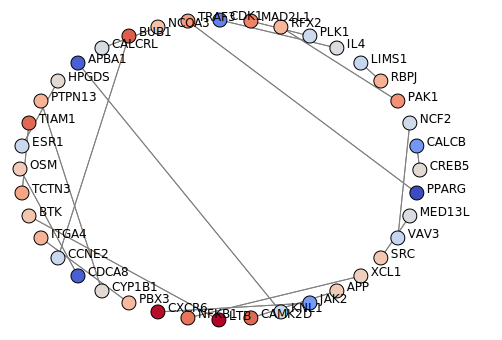

In [134]:
image = visualize_graph(adjacency, position, scores=np.log(df['combined_score']), names=genes, display_node_weight=True)
SVG(image)